In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

Number of points in the domain = 421


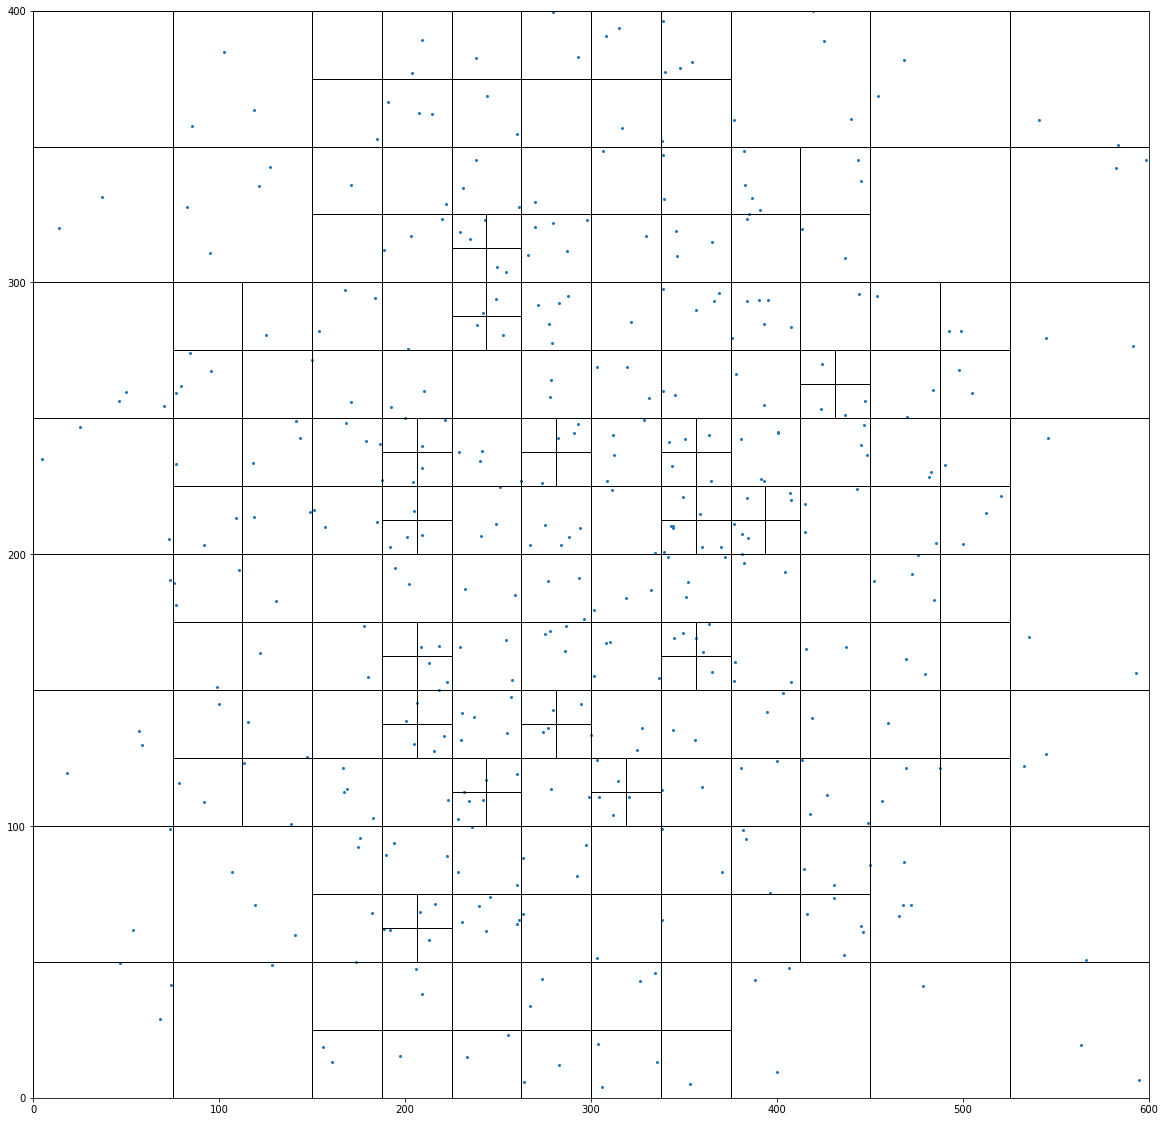

In [2]:
class Point:
    def __init__(self, x, y):
        self.x, self.y = x, y

class Rect:
    def __init__(self, cx, cy, w, h):
        self.cx, self.cy = cx, cy
        self.w, self.h = w, h
        self.west_edge, self.east_edge = cx - w/2, cx + w/2
        self.north_edge, self.south_edge = cy - h/2, cy + h/2
    
    def contains(self, point):

        point_x, point_y = point.x, point.y

        return (point_x >= self.west_edge and
                point_x <  self.east_edge and
                point_y >= self.north_edge and
                point_y < self.south_edge)
    
    
    def draw(self, ax, c='k', lw=1, **kwargs):
        x1, y1 = self.west_edge, self.north_edge
        x2, y2 = self.east_edge, self.south_edge
        ax.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], c=c, lw=lw, **kwargs)
    
class QuadTree:
    def __init__(self, boundary, max_points=4, depth=0):
       
        self.boundary = boundary
        self.max_points = max_points
        self.points = []
        self.depth = depth
        self.divided = False
    
    def divide(self):

        cx, cy = self.boundary.cx, self.boundary.cy
        w, h = self.boundary.w / 2, self.boundary.h / 2
       
    
        self.nw = QuadTree(Rect(cx - w/2, cy - h/2, w, h),
                                    self.max_points, self.depth + 1)
        self.ne = QuadTree(Rect(cx + w/2, cy - h/2, w, h),
                                    self.max_points, self.depth + 1)
        self.se = QuadTree(Rect(cx + w/2, cy + h/2, w, h),
                                    self.max_points, self.depth + 1)
        self.sw = QuadTree(Rect(cx - w/2, cy + h/2, w, h),
                                    self.max_points, self.depth + 1)
        self.divided = True

    def insert(self, point):


        if not self.boundary.contains(point):
            # The point does not lie inside boundary: bail.
            return False
        if len(self.points) < self.max_points:
            # There's room for our point without dividing the QuadTree.
            self.points.append(point)
            return True

        # No room: divide if necessary, then try the sub-quads.
        if not self.divided:
            self.divide()

        return (self.ne.insert(point) or
                self.nw.insert(point) or
                self.se.insert(point) or
                self.sw.insert(point))
    def __len__(self):


        npoints = len(self.points)
        if self.divided:
            npoints += len(self.nw)+len(self.ne)+len(self.se)+len(self.sw)
        return npoints
    
    def draw(self, ax):

        self.boundary.draw(ax)
        if self.divided:
            self.nw.draw(ax)
            self.ne.draw(ax)
            self.se.draw(ax)
            self.sw.draw(ax)

width, height = 600, 400
N = 500
coords = np.random.randn(N, 2) * height/3 + (width/2, height/2)
points = [Point(*coord) for coord in coords]

domain = Rect(width/2, height/2, width, height)
qtree = QuadTree(domain, 3)
for point in points:
    qtree.insert(point)
print('Number of points in the domain =', len(qtree))

fig = plt.figure(figsize=(20,20))
ax = plt.subplot()
ax.set_xlim(0, width)
ax.set_ylim(0, height)
qtree.draw(ax)

ax.scatter([p.x for p in points], [p.y for p in points], s=4)
ax.set_xticks([0,100,200,300,400,500,600])
ax.set_yticks([0,100,200,300,400]);

Number of points in the domain = 7


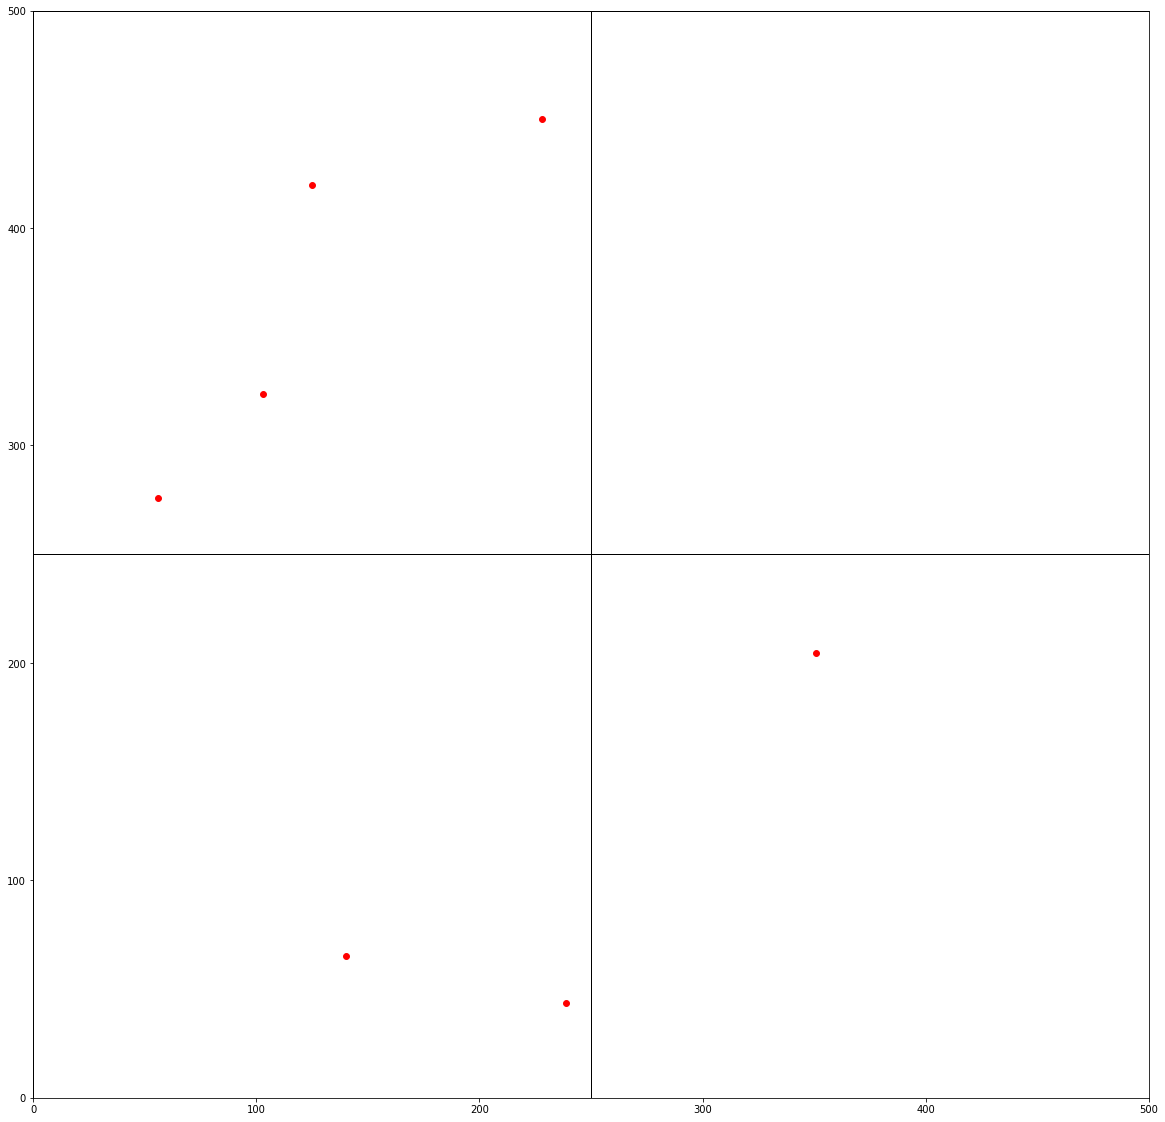

In [3]:
width, height = 500, 500
N = 10
coords = np.random.randn(N, 2) * height/3 + (width/2, height/2)
points = [Point(*coord) for coord in coords]

domain = Rect(width/2, height/2, width, height)
qtree = QuadTree(domain, 3)
for point in points:
    qtree.insert(point)
print('Number of points in the domain =', len(qtree))

fig = plt.figure(figsize=(20,20))
ax = plt.subplot()
ax.set_xlim(0, width)
ax.set_ylim(0, height)
qtree.draw(ax)

ax.scatter([p.x for p in points], [p.y for p in points], s=35,color="red")
ax.set_xticks([0,100,200,300,400,500])
ax.set_yticks([0,100,200,300,400,500]);